[[0.         0.         0.        ]
 [0.74509804 0.76470588 0.        ]
 [0.78431373 0.80392157 0.        ]
 [0.82352941 0.94117647 0.        ]]
(4, 3)


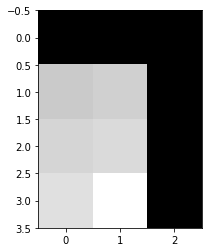

In [7]:
# 이미지 데이터셋의 이해

# 그레이스케일(회색조) 데이터는 0~255의 값을 가짐
# 흑백(0또는 1만 있음)

import numpy as np
import matplotlib.pyplot as plt

img= [[0,0,0],
      [190,195,0], 
      [200,205,0], 
      [210,240,0]]

imgarr = np.array(img)
imgarrSc=imgarr/255     # 스케일을 해도 동일한 이미지가 출력됨

print(imgarrSc)
print(np.shape(imgarr))
plt.imshow(imgarr, cmap='gray')

In [11]:
# reshape을 이용해서 4*3을 12로 변경
imgRe12=imgarr.reshape(4*3)
np.shape(imgRe12)

imgRe12_=imgarr.reshape(1, 4*3) # 옆으로 데이터 쭉 풀어 놓음 4*3, 1 은 아래로 풀어놓음
np.shape(imgRe12_)

(1, 12)

(2, 4, 3)
(4, 3)


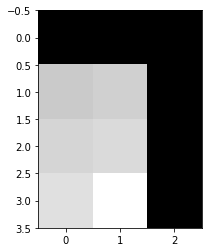

In [19]:
imgs=[
    [[0,0,0],
     [190,195,0],
     [200,205,0],
     [210,240,0]],

    [[255,255,0],
     [0,5,0],
     [200,205,0],
     [210,240,0]]
]
imgsarr=np.array(imgs)
print(np.shape(imgsarr))
print(np.shape(imgsarr[0]))
plt.imshow(imgsarr[0], cmap='gray')

In [21]:
tmp=imgsarr.reshape(2, 4*3)
print(tmp)
print(np.shape(tmp))

#------2,12를 2,4,3으로 변경해야함-------
#tmp.reshape()

[[  0   0   0 190 195   0 200 205   0 210 240   0]
 [255 255   0   0   5   0 200 205   0 210 240   0]]
(2, 12)


In [22]:
tmp.reshape(-1,4,3)

array([[[  0,   0,   0],
        [190, 195,   0],
        [200, 205,   0],
        [210, 240,   0]],

       [[255, 255,   0],
        [  0,   5,   0],
        [200, 205,   0],
        [210, 240,   0]]])

## 신경망 적용해보기
 - 데이터는 숫자 이미지(28,28)와 숫자에 해당하는 레이블로 구성되어 있음
  - 60,000개 학습데이터, 10,000개 테스트 데이터



### MNIST 데이터셋 다운로드
- 케라스에서 제공하는 데이터셋은 전부 tf.keras.datasets를 통해 접근 가능   
- load_data() 함수는 (x_train, y_train), (x_test, y_test) 형태로 분할해서 제공

In [76]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
# npz는 npy라는 numpy형태의 자료를 압축한자료(2개이상의 npy자료), csv로 갖고다녀도 되나(numpy가 속도가 더 빠름)

# x_train <- [0][0], y_train <- [0][1]  /   x_test <- [1][0], y_test<-[1][1]
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [77]:
# 데이터의 불균형을 확인해양함
np.unique(y_train)  # 이 자료의 value Count를 확인해야함.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
tmp=load_data(path='mnist.npz')
np.shape(tmp)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(2, 2)

In [33]:
#tmp[0][0]   # x_train
tmp[0][1]  # x_train의 레이블
#tmp[1][0]  # 
#tmp[1][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

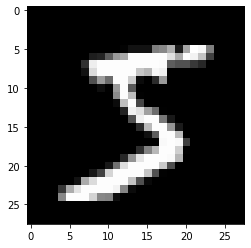

In [32]:
plt.imshow(tmp[0][0][0], cmap='gray')     # x_train의 첫번째 이미지

In [35]:
# list(tmp)   # npz의 내용물을 확인할 수도 있음

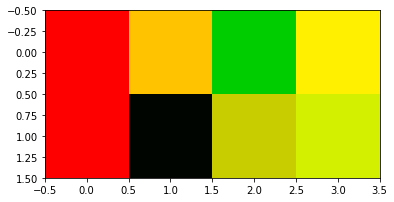

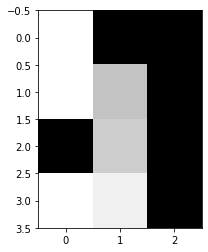

In [48]:
## 컬러이미지
color=np.array([
    [[255,0,0],[255,195,0],[0,205,0],[255,240,0]],
    [[255,0,0],[0,5,0],[200,205,0],[210,240,0]]
])

plt.imshow(color)
plt.show()

plt.imshow(color[0],cmap='gray')

### 데이터 형태 확인
- 데이터, 레이블가 어떻게 구성되어 있는지 확인해보는 과정은
필수!
- 제공되는 코드를 통해 데이터를 그려보세요.

In [80]:
# 훈련 데이터
print('#######훈련데이터#######\n',x_train.shape, y_train.shape)
print(y_train)

print('\n')

# 테스트 데이터
print('#######테스트데이터#######\n',x_test.shape, y_test.shape)
print(y_test)

#######훈련데이터#######
 (60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


#######테스트데이터#######
 (10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


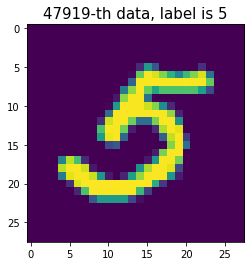

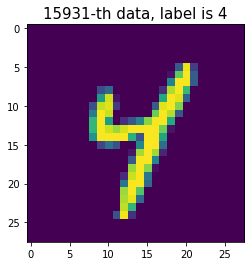

In [81]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 2
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size = sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' % (idx,label), fontsize = 15)

Text(0.5, 1.0, '15931-th data, label is 7')

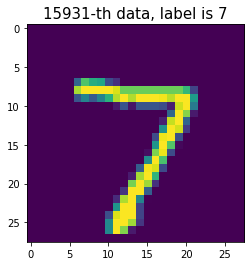

In [82]:
# 마지막에 예측해볼 데이터
img = x_test[0,:]
label = y_test[0]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx,label), fontsize = 15)

In [83]:
for i in x_train[4]:
  for j in i:
    print('{:4}'.format(j), end="")
  print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 168   0

#### 모델 검증을 위해 검증 데이터셋을 만듭니다
- train_test_split() 함수 사용
- test_size: 테스트 데이터셋 비율
- random_state: 재생산성

In [84]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

print(f'훈련 데이터:{x_train.shape}, 레이블:{y_train.shape}')
print(f'검증 데이터:{x_val.shape}, 레이블:{y_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


#### 학습을 위해 전처리를 수행해야 함
- 255로 나눠주어 0~1사이로 스케일 조정
- 신경망은 스케일에 매우 민감!
- Dense 층 사용을 위해 784차원의 1차원 배열로 변환

In [85]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경합니다.(현재 인공신경망은 CNN이 아니라 완전연결 층만 사용하기 때문)

(42000, 784)


### 모델 입력을 위한 레이블 전처리
 - 모델 마지막 층에서 소프트맥스 함수를 사용하므로 범주형 레이블로 변환
  - to_categorical()함수

In [86]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [87]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [88]:
# 아래의 숫자가 모델이 최종 dense의 units의 숫자와 맞아야함
print(len(y_train[0]))
y_train.shape[1]

10


10

### 시그모이드, 소프트맥스 함수
 - 소프트맥스 함수는 출력값의 범위 안에서 확률로써 해ㅐ석할 수 있기에, 결과의 해석이 더욱 용이함
  - 다른표현: 일반적으로 확률을 구하는 방법과 비슷하므로 각 클래스에 해당하는 값들이 서로 영향을 줄 수 있어 비교에 용이

In [89]:
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr - m # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

### 학습과정 설정하기
 - 모델 구성의 마지막 단계는 손실 함수, 옵티마이저, 평가지표를 설정하는 것
  - 다중 분류 문제엥서 손실 함수는 categorical_crossentropy 함수를 사용
  - 크로스 엔트로피는 정보이론에서 파생된 개념
  - 서로의 결과값이 틀린 경우 로그 함수의 특징대로 무한대로 발산하고, 동일한 경우 0으로 수렴
  - 옵티마이ㅣ저는 Adam, 평가지표는 정확도(Acc)를 사용합니다.



In [91]:
model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

In [92]:
model.summary()     # Param의 갯수가 많을 수록 w, b계산을 많이함

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### 모델 학습하기
- validation_data에 검증 데이터셋을 전달하고, 128 배치크기를 사용하며, 전체 데이터를 30회 반복

- 최적의 모델 사용법
- [방법1]학습된 모델은 오버피팅을 보소 학습 횟수를 다시 조정해서 작업완료하고 h5모델로 저장
- [방법2] 에포크단위로 h5모델로 저장함, 추후에 필요한 에포크 단위의 모델만 사용

In [93]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, # 42,000개의 train데이터를 / 128
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.5019 - acc: 0.8589 - val_loss: 0.2510 - val_acc: 0.9277
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2100 - acc: 0.9391 - val_loss: 0.1956 - val_acc: 0.9421
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1621 - acc: 0.9523 - val_loss: 0.1671 - val_acc: 0.9499
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1287 - acc: 0.9616 - val_loss: 0.1520 - val_acc: 0.9561
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1094 - acc: 0.9678 - val_loss: 0.1362 - val_acc: 0.9599
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0927 - acc: 0.9726 - val_loss: 0.1257 - val_acc: 0.9624
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0788 - acc: 0.9773 - val_loss: 0.1210 - val_acc: 0.9652
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

### 학습 결과 그리기
- model.fit() 함수는 History 객체를 전달합니다. 이를 활용하여 학습 과정을 손쉽게 모니터링 할 수 있음



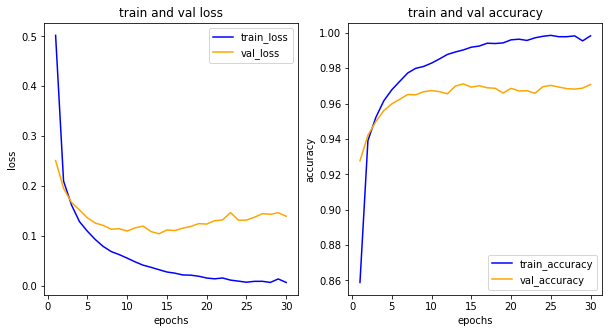

In [94]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

- 두 그래프가 어디서부터 벌어지나요?
  - 과대적합 문제가 나타난 것
  - 데이터 특성, 모델 구조 등을 수정해보고 재학습
  - 벌어지기 전까지의 모델을 사용하여 결과를 확인하고 이를 저장 및 기록


### 모델평가

In [95]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1400 - acc: 0.9725


[0.1399671733379364, 0.9725000262260437]

### 학습된 모델을 통해 값 예측하기

In [96]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[8.1066398e-10 1.1096624e-16 1.8531789e-11 1.0005656e-06 3.3662164e-16
 3.6095831e-13 6.8043935e-20 9.9999905e-01 4.0161159e-11 7.9764879e-09]


### 예측값 그려서 확인해보기

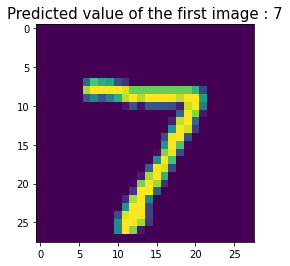

In [60]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]), fontsize = 15)
plt.show()

------------실제값----------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7
------------예측값-----------
[[8.1065937e-10 1.1096539e-16 1.8531681e-11 1.0005580e-06 3.3661907e-16
  3.6095625e-13 6.8043677e-20 9.9999905e-01 4.0161079e-11 7.9764266e-09]] 7


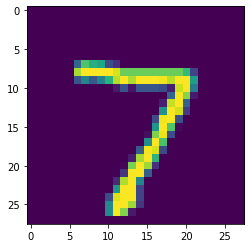

In [97]:
x_test[0].shape

x_test_img=x_test.reshape(10000,28,28)

print('------------실제값----------')
plt.imshow(x_test_img[0])
print(y_test[0], np.argmax(y_test[0]))

print('------------예측값-----------')
y_pred=model.predict(x_test[:1])        # 텐서에 들어갈때모습=>[행렬] (참고: 스칼라->벡터->행렬->텐서)
print(y_pred, np.argmax(y_pred))

------------실제값-----------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
------------예측값-----------
[[8.5981801e-19 3.9706623e-12 2.2121796e-11 1.6092159e-14 7.0082785e-12
  9.9977726e-01 2.2273914e-04 1.0776748e-13 2.7539487e-10 6.4226996e-12]] 5


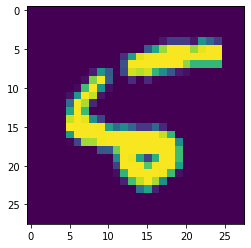

In [98]:
x_test[0].shape

x_test_img=x_test.reshape(10000,28,28)

num=8
print('------------실제값-----------')
plt.imshow(x_test_img[num])
print(y_test[num], np.argmax(y_test[num]))

print('------------예측값-----------')
y_pred=model.predict(x_test[num:num+1])        # 텐서에 들어갈때모습=>[행렬] (참고: 스칼라->벡터->행렬->텐서)
print(y_pred, np.argmax(y_pred))

### 모델 평가 방법 1 - 혼동 행렬

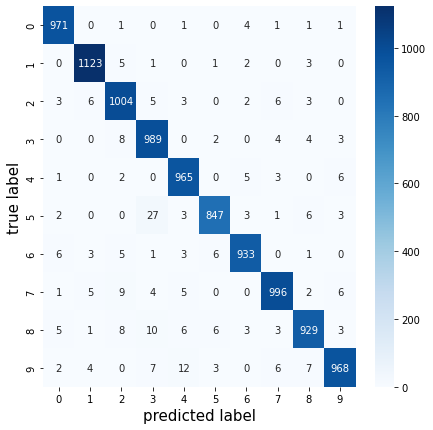

In [99]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

### 모델 평가 방법 2 - 분류 보고서

In [100]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.95      0.96       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

